In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
file_path = '/content/Mall_Customers.csv'
df = pd.read_csv(file_path)

# Drop the CustomerID column as it's not relevant for clustering
df_cleaned = df.drop(columns=['CustomerID'])

# Encode Gender into numerical format (Male=1, Female=0)
label_encoder = LabelEncoder()
df_cleaned['Gender'] = label_encoder.fit_transform(df_cleaned['Gender'])


In [ ]:
# Selecting features for clustering (Age, Annual Income, Spending Score)
X = df_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Finding the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

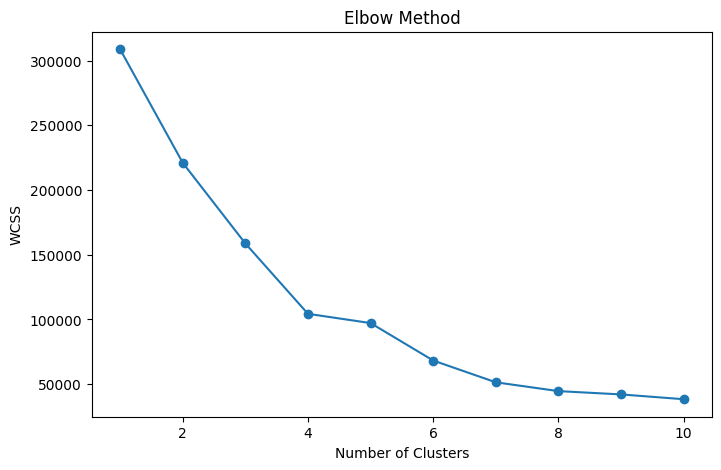

In [ ]:
# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

In [ ]:
# Apply KMeans with the optimal number of clusters (5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the original dataframe
df_cleaned['Cluster'] = y_kmeans

# Show a few rows of the resulting dataframe with the cluster labels
print(df_cleaned.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1   19                  15                      39        2
1       1   21                  15                      81        2
2       0   20                  16                       6        0
3       0   23                  16                      77        2
4       0   31                  17                      40        0
